In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # type: ignore

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#whole_data = pd.read_csv(r'Data\Review.csv')
whole_data = pd.read_csv(r'Data\SA_Data.csv')
whole_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
data=whole_data[['Score','Text']]
data

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


In [5]:
#Identifying misssing values
data.isnull().sum()

Score    0
Text     0
dtype: int64

In [6]:
# Drop rows with any missing values
data = data.dropna()

<Axes: xlabel='Score'>

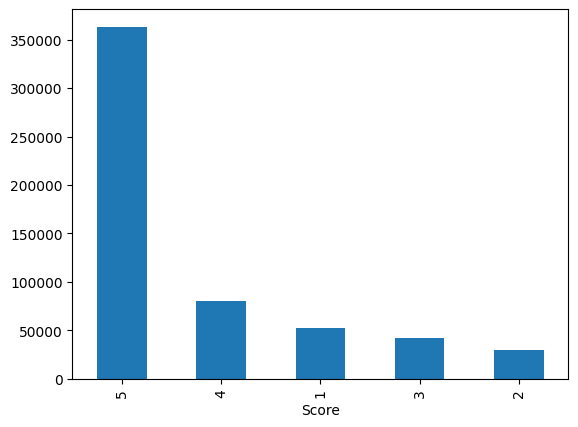

In [7]:
#Plotting the scores (Rating)
data['Score'].value_counts().plot.bar()

DATA PREPROCESSING

Stop Words are common words that are usually filtered out in NLP, because they don't carry significant meaning
example: is, the ...

In [8]:
#Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
#Adding Custom words to remove from the dataset
custom_stopwords={"br","'s","n't"}
stop_words.update(custom_stopwords)
stop_words

{"'s",
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 "n't",
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out'

After doing lemmatization, it may not give us the expected root form of words because the WordNetLemmatizer() in NLTK requires the correct part-of-speech (POS) tag to perform accurate lemmatization.
To improve the lemmatization process, we need to provide correct "POS tags" for each word.

In [11]:
import re
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [15]:
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup

corpus = []

for i in range(len(data)):
    # Remove URLs
    Cleaned_text = re.sub(r'http\S+|www\S+|https\S+|href\S+', ' ', data["Text"][i], flags=re.MULTILINE)

    # Parse HTML using BeautifulSoup
    soup = BeautifulSoup(Cleaned_text, 'html.parser')

    # Get text content without HTML tags
    Cleaned_text = soup.get_text(separator=' ')

    # Remove unwanted characters & numbers
    Cleaned_text = re.sub(r'[<>=,.()/!]+', ' ', Cleaned_text)
    Cleaned_text = re.sub('[^a-zA-Z]', ' ', Cleaned_text)

    # Replace extra spaces and angle brackets left by BeautifulSoup
    Cleaned_text = re.sub(r'\s+', ' ', Cleaned_text).strip()
    
    #Changing to lowercase
    Cleaned_text = Cleaned_text.lower()

    #word_tokenize interface for tokenization
    Cleaned_text = word_tokenize(Cleaned_text)
    
    # POS tagging
    pos_tags = pos_tag(Cleaned_text)
    
    # Lemmatize with POS tags
    Cleaned_text = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags if word not in stop_words]
    
    # Join the words back into a single string
    Cleaned_text = " ".join(Cleaned_text)
    corpus.append(Cleaned_text)

data['Cleaned_Text'] = corpus
print(data['Cleaned_Text'])

0         buy several vitality can dog food product find...
1         product arrive label jumbo salt peanut peanut ...
2         confection around century light pillowy citrus...
3         look secret ingredient robitussin believe find...
4         great taffy great price wide assortment yummy ...
                                ...                        
568449    great sesame chicken good good resturants eat ...
568450    disappoint flavor chocolate note especially we...
568451    star small give one training session try train...
568452    best treat training reward dog good groom low ...
568453    satisfied product advertised use cereal raw vi...
Name: Cleaned_Text, Length: 568454, dtype: object


In [16]:
data['Text'][25]

'Product received is as advertised.<br /><br /><a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>'

In [17]:
data['Cleaned_Text'][25]

'product receive advertised'

In [18]:
#Finding the count of each word
temp_data = pd.Series(' '.join(data['Cleaned_Text']).split()).value_counts()
temp_data

like          283826
taste         253680
good          246921
flavor        202056
one           192928
               ...  
kamoun             1
kharkoum           1
skinjbir           1
libzar             1
grasssaver         1
Name: count, Length: 95899, dtype: int64

In [19]:
#Filering out the words with count <=1
drops = temp_data[temp_data <= 1]
drops

undevoured    1
cabella       1
kyo           1
chocalatey    1
unecesary     1
             ..
kamoun        1
kharkoum      1
skinjbir      1
libzar        1
grasssaver    1
Name: count, Length: 39855, dtype: int64

In [20]:
#Removing the words with count<=1
data['Cleaned_Text'] = data['Cleaned_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
data['Cleaned_Text']

0         buy several vitality can dog food product find...
1         product arrive label jumbo salt peanut peanut ...
2         confection around century light pillowy citrus...
3         look secret ingredient robitussin believe find...
4         great taffy great price wide assortment yummy ...
                                ...                        
568449    great sesame chicken good good resturants eat ...
568450    disappoint flavor chocolate note especially we...
568451    star small give one training session try train...
568452    best treat training reward dog good groom low ...
568453    satisfied product advertised use cereal raw vi...
Name: Cleaned_Text, Length: 568454, dtype: object

# VADER

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
data['Cleaned_Text'].head(10)

0    buy several vitality can dog food product find...
1    product arrive label jumbo salt peanut peanut ...
2    confection around century light pillowy citrus...
3    look secret ingredient robitussin believe find...
4    great taffy great price wide assortment yummy ...
5    get wild hair taffy order five pound bag taffy...
6    saltwater taffy great flavor soft chewy candy ...
7    taffy good soft chewy flavor amaze would defin...
8    right mostly sprout cat eat grass love rotate ...
9    healthy dog food good digestion also good smal...
Name: Cleaned_Text, dtype: object

The SentimentIntensityAnalyzer from NLTK's VADER module is a useful tool for performing sentiment analysis. We use the SentimentIntensityAnalyzer to get sentiment scores for individual sentences or larger pieces of text. The polarity_scores method returns a dictionary with the following keys: neg: Negative sentiment score (range from 0 to 1). neu: Neutral sentiment score (range from 0 to 1). pos: Positive sentiment score (range from 0 to 1). compound: A compound score that combines the three sentiment scores into a single value, ranging from -1 (most negative) to +1 (most positive).

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

In [24]:
#applying vader in our dataset
data["Cleaned_Text"][0:10].apply(lambda x: sa.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.525, 'pos': 0.475, 'comp...
1    {'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...
2    {'neg': 0.132, 'neu': 0.576, 'pos': 0.292, 'co...
3    {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...
4    {'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...
5    {'neg': 0.043, 'neu': 0.665, 'pos': 0.292, 'co...
6    {'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'comp...
7    {'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'comp...
8    {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...
9    {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...
Name: Cleaned_Text, dtype: object

In [25]:
data["Cleaned_Text"][0:10].apply(lambda x: sa.polarity_scores(x)["compound"])

0    0.9246
1   -0.1027
2    0.8624
3    0.4404
4    0.9468
5    0.9136
6    0.9422
7    0.9274
8    0.6369
9    0.8176
Name: Cleaned_Text, dtype: float64

In [26]:
data["polarity_score"] = data["Cleaned_Text"].apply(lambda x: sa.polarity_scores(x)["compound"])
data

,Score,Text,Cleaned_Text,polarity_score
0,5,I have bought several of the Vitality canned d...,buy several vitality can dog food product find...,0.9246
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salt peanut peanut ...,-0.1027
2,4,This is a confection that has been around a fe...,confection around century light pillowy citrus...,0.8624
3,2,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...,0.4404
4,5,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.9468
...,...,...,...,...
568449,5,Great for sesame chicken..this is a good if no...,great sesame chicken good good resturants eat ...,0.9337
568450,2,I'm disappointed with the flavor. The chocolat...,disappoint flavor chocolate note especially we...,-0.5640
568451,5,"These stars are small, so you can give 10-15 o...",star small give one training session try train...,0.8860
568452,5,These are the BEST treats for training and rew...,best treat training reward dog good groom low ...,0.9758


In [27]:
#Rule for determining the Sentiment
data['Sentiments']=data["Cleaned_Text"].apply(lambda x: 'positive' if sa.polarity_scores(x)["compound"] >= 0.5  else 'negative' if sa.polarity_scores(x)["compound"] <= -0.5  else 'neutral')
data.head(30)

,Score,Text,Cleaned_Text,polarity_score,Sentiments
0,5,I have bought several of the Vitality canned d...,buy several vitality can dog food product find...,0.9246,positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salt peanut peanut ...,-0.1027,neutral
2,4,This is a confection that has been around a fe...,confection around century light pillowy citrus...,0.8624,positive
3,2,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...,0.4404,neutral
4,5,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.9468,positive
5,4,I got a wild hair for taffy and ordered this f...,get wild hair taffy order five pound bag taffy...,0.9136,positive
6,5,This saltwater taffy had great flavors and was...,saltwater taffy great flavor soft chewy candy ...,0.9422,positive
7,5,This taffy is so good. It is very soft and ch...,taffy good soft chewy flavor amaze would defin...,0.9274,positive
8,5,Right now I'm mostly just sprouting this so my...,right mostly sprout cat eat grass love rotate ...,0.6369,positive
9,5,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...,0.8176,positive


In [28]:
#To find the number of Positive, negative, and neutal reviews
data["Sentiments"].value_counts()

Sentiments
positive    471402
neutral      80608
negative     16444
Name: count, dtype: int64

The LabelEncoder from Scikit-learn to convert the sentiment scores into numerical labels. The LabelEncoder will find all unique values in the data["Sentiment"] column. It will assign a unique integer to each unique sentiment score. The sentiment scores is replaced by these integer labels [0,1,2]. 

LabelEncoder() initializes a new instance of the LabelEncoder class. ".fit_transform(data["Sentiment"])" performs two actions: 1.fit: Learns the unique values in data["Sentiment"]. 2.transform: Converts these unique values into numerical labels.

In [29]:
# The sentiment value (which were previously categorical label from the VADER analysis) is replaced by integer labels [0,1,2]
from sklearn.preprocessing import LabelEncoder
data["Sentiment"] = LabelEncoder().fit_transform(data["Sentiments"])
data.head(20)

,Score,Text,Cleaned_Text,polarity_score,Sentiments,Sentiment
0,5,I have bought several of the Vitality canned d...,buy several vitality can dog food product find...,0.9246,positive,2
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salt peanut peanut ...,-0.1027,neutral,1
2,4,This is a confection that has been around a fe...,confection around century light pillowy citrus...,0.8624,positive,2
3,2,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...,0.4404,neutral,1
4,5,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.9468,positive,2
5,4,I got a wild hair for taffy and ordered this f...,get wild hair taffy order five pound bag taffy...,0.9136,positive,2
6,5,This saltwater taffy had great flavors and was...,saltwater taffy great flavor soft chewy candy ...,0.9422,positive,2
7,5,This taffy is so good. It is very soft and ch...,taffy good soft chewy flavor amaze would defin...,0.9274,positive,2
8,5,Right now I'm mostly just sprouting this so my...,right mostly sprout cat eat grass love rotate ...,0.6369,positive,2
9,5,This is a very healthy dog food. Good for thei...,healthy dog food good digestion also good smal...,0.8176,positive,2


In [30]:
#Sentiment Values in the dataset
data["Sentiment"].value_counts()

Sentiment
2    471402
1     80608
0     16444
Name: count, dtype: int64

WordCloud

In [31]:
!pip install wordcloud

In [32]:
from wordcloud import WordCloud

In [33]:
# Seperating Positive, Negative and Neutral Sentiment
positive_texts = ' '.join(data[data['Sentiment'] == 2]['Cleaned_Text'])
neutral_texts = ' '.join(data[data['Sentiment'] == 1]['Cleaned_Text'])
negative_texts = ' '.join(data[data['Sentiment'] == 0]['Cleaned_Text'])

In [34]:
print(f'Positive texts length: {len(positive_texts)}')
print(f'Neutral texts length: {len(neutral_texts)}')
print(f'Negative texts length: {len(negative_texts)}')

Positive texts length: 122278464
Neutral texts length: 13135088
Negative texts length: 4437614


In [35]:
# Generating word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_texts)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_texts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_texts)


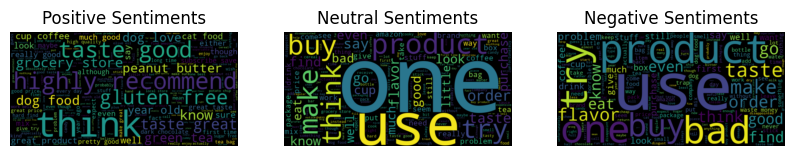

In [36]:
# Display the word clouds
wordcloud_fig=plt.figure(figsize=(10, 10))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiments')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiments')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiments')
plt.axis('off')

plt.show()

wordcloud_fig.savefig("wordcloud2.png")

In [37]:
#Assigning X values
X = data["Cleaned_Text"] # independent variable

In [38]:
#Assigning Y values
Y= data["Sentiment"] #dependent Variable

DATA Splitting

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# TF-IDF

TF-IDF is similar to "CountVectorizer()" but instead of just counting the occurence of words in each document, it calculates the term frequency- inverse document frequency (TF-IDF) value of each value.

* Term Frequency (TF):- It measures how frequently a term(word) appears in a document
TF = (Number of times term t appears in a document) / (Total number of terms in the document)

* Inverse Document Frequency (IDF):- Measures how important a term is across the entire corpus.
IDF = log_e(Total number of documents / Number of documents with term t in it)

* TF-IDF:- It is the product of TF and IDF, giving a higher weight to terms that are rare in the entire corpus but frequent in specific documents.
TF-IDF = TF * IDF



In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()

# Fit and transform the document
#X_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_train_tfidf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tfidf = tf_idf_vectorizer.transform(X_test)

In [41]:
print("TF-IDF Feature Names:")
tf_idf_vectorizer.get_feature_names_out()[1:50]

TF-IDF Feature Names:


array(['aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaarrrrrggghhh', 'aaaaaah',
       'aaaaah', 'aaaah', 'aaaahhhhhh', 'aaaand', 'aaah', 'aaahhh',
       'aaahs', 'aachen', 'aadmit', 'aaf', 'aafco', 'aafes', 'aah',
       'aahs', 'aaloo', 'aamazon', 'aamzon', 'aand', 'aany', 'aap',
       'aare', 'aaron', 'aarp', 'ab', 'aback', 'abalone', 'abandon',
       'abandoned', 'abate', 'abb', 'abba', 'abbaye', 'abbey', 'abbie',
       'abbott', 'abbotts', 'abbreviate', 'abbreviated', 'abbreviation',
       'abby', 'abc', 'abcstores', 'abctoy'], dtype=object)

In [ ]:
X_train_tfidf.toarray()

In [43]:
# Print the TF-IDF matrix for debugging
print("TF-IDF Matrix Shape:")
print(X_train_tfidf.shape)

TF-IDF Matrix Shape:
(454763, 55122)


In [45]:
# Perform scaling on TF-IDF data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

# Now X_train_scaled and X_test_scaled can be used for model training and testing
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (454763, 55122)
X_test_scaled shape: (113691, 55122)


N-Gram Frequency

In [46]:
tf_idf_vectorizer_2 = TfidfVectorizer(ngram_range=(2,2), max_df=0.85, min_df=2, stop_words='english')
X_train_tfidf_ngram = tf_idf_vectorizer_2.fit_transform(X_train)
X_test_tfidf_ngram = tf_idf_vectorizer_2.fit_transform(X_test)
tf_idf_vectorizer_2.get_feature_names_out()[1:50]

array(['aa variety', 'aaa market', 'aaaaa try', 'aaaaaaarrrrrggghhh dark',
       'aaaand sure', 'aafco factor', 'aafco guideline',
       'aafco regulation', 'ab understanding', 'ab work', 'aback sip',
       'abandon house', 'abandon original', 'abandon soft',
       'abbreviate soon', 'abby female', 'abc news', 'abc store',
       'abc today', 'abc wholesale', 'abdomen continue',
       'abdominal cramping', 'abdominal pain', 'abhors sin',
       'ability actually', 'ability bite', 'ability buy',
       'ability choose', 'ability coffee', 'ability cut', 'ability deal',
       'ability digest', 'ability drink', 'ability eat', 'ability energy',
       'ability enjoy', 'ability fall', 'ability great', 'ability help',
       'ability hold', 'ability induce', 'ability knaw', 'ability know',
       'ability lower', 'ability make', 'ability mean',
       'ability normally', 'ability order', 'ability participate'],
      dtype=object)

In [47]:
print("X_train_tfidf_ngramshape:", X_train_tfidf_ngram.shape)
print("X_test_tfidf_ngram shape:", X_test_tfidf_ngram.shape)

X_train_tfidf_ngramshape: (454763, 1158067)
X_test_tfidf_ngram shape: (113691, 409222)


In [55]:
X_train_tfidf_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Count Vectorizer

CountVectorizer from Scikit-learn is used to convert a collection of text documents into a matrix of token counts. This is a common preprocessing step in natural language processing (NLP) and text mining tasks. It creates a bag-of-words representation, where each text document is represented by the frequency (or count) of each word that appears in the document. This model does not consider word order but focuses on the presence or absence of words. Each unique word in the corpus becomes a feature (a column in the matrix), and each document is represented as a vector where the value of each feature is the count of that word in the document.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [49]:
vectorizer.get_feature_names_out()[1:50]

array(['aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaarrrrrggghhh', 'aaaaaah',
       'aaaaah', 'aaaah', 'aaaahhhhhh', 'aaaand', 'aaah', 'aaahhh',
       'aaahs', 'aachen', 'aadmit', 'aaf', 'aafco', 'aafes', 'aah',
       'aahs', 'aaloo', 'aamazon', 'aamzon', 'aand', 'aany', 'aap',
       'aare', 'aaron', 'aarp', 'ab', 'aback', 'abalone', 'abandon',
       'abandoned', 'abate', 'abb', 'abba', 'abbaye', 'abbey', 'abbie',
       'abbott', 'abbotts', 'abbreviate', 'abbreviated', 'abbreviation',
       'abby', 'abc', 'abcstores', 'abctoy'], dtype=object)

In [58]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
# Perform scaling on Count vectorized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled_cv = scaler.fit_transform(X_train_cv)
X_test_scaled_cv = scaler.transform(X_test_cv)

# Now X_train_scaled and X_test_scaled can be used for model training and testing
print("X_train_scaled shape:", X_train_scaled_cv.shape)
print("X_test_scaled shape:", X_test_scaled_cv.shape)

X_train_scaled shape: (454763, 55122)
X_test_scaled shape: (113691, 55122)


# Sentiment Analysis Modeling

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [52]:
pip install scikit-optimize


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import uniform
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import confusion_matrix

# Support Vector Classifier - SVC

In [54]:
from sklearn.svm import SVC

In [ ]:
# TF-IDF Word-Level
svc_tf_model = SVC(kernel='poly', C=10).fit(X_train_tfidf, y_train)
cross_val_score(svc_tf_model, X_train_tfidf, y_train, cv=5, n_jobs=-1).mean()

Grid Search - SVC

In [57]:
# Define the model and parameter grid for tuning
svc_grid = SVC()
param_svc_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
    }


# Perform GridSearchCV with cross-validation
grid_search_svc = GridSearchCV(estimator=svc_grid, param_grid=param_svc_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search_svc.fit(X_train_scaled, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_svc_grid = grid_search_svc.best_estimator_
best_svc_grid.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_svc_grid = scaler.transform(X_test_scaled)
y_pred_svc_grid = best_svc_grid.predict(X_test_scaled_svc_grid)

#Calculate the accuracy
acc_svc_grid=accuracy_score(y_test,y_pred_svc_grid)
print(f'Accuracy: {acc_svc_grid:.2f}')

# Calculate performance metrics
mse_svc_grid = mean_squared_error(y_test, y_pred_svc_grid)
print(f'Mean Squared Error on Test Set: {mse_svc_grid:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {grid_search_svc.best_params_}')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Accuracy: 0.82
Mean Squared Error on Test Set: 0.27
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [58]:
print(classification_report(y_test, y_pred_svc_grid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.27      0.33      0.30      2000
weighted avg       0.67      0.82      0.74      2000



 Grid Search - SVC with Count Vectorizer

In [59]:
# Define the model and parameter grid for tuning
svc_grid_cv = SVC()
param_svc_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
    }


# Perform GridSearchCV with cross-validation
grid_search_svc_cv = GridSearchCV(estimator=svc_grid_cv, param_grid=param_svc_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search_svc_cv.fit(X_train_scaled_cv, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_svc_grid_cv = grid_search_svc_cv.best_estimator_
best_svc_grid_cv.fit(X_train_scaled_cv, y_train)

#Evaluate the final model on the test set
X_test_scaled_svc_grid_cv = scaler.transform(X_test_scaled_cv)
y_pred_svc_grid_cv = best_svc_grid_cv.predict(X_test_scaled_svc_grid_cv)

#Calculate the accuracy
acc_svc_grid_cv=accuracy_score(y_test,y_pred_svc_grid_cv)
print(f'Accuracy: {acc_svc_grid_cv:.2f}')

# Calculate performance metrics
mse_svc_grid_cv = mean_squared_error(y_test, y_pred_svc_grid_cv)
print(f'Mean Squared Error on Test Set: {mse_svc_grid_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {grid_search_svc_cv.best_params_}')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Accuracy: 0.82
Mean Squared Error on Test Set: 0.26
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [60]:
print(classification_report(y_test, y_pred_svc_grid_cv))

              precision    recall  f1-score   support

           0       0.33      0.02      0.03        57
           1       0.40      0.01      0.01       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.52      0.34      0.32      2000
weighted avg       0.74      0.82      0.74      2000



Random Search - SVC

In [61]:
# Define the model and parameter grid for tuning
svc_rand = SVC()
param_svc_rand = {
    'C': np.logspace(-3, 2, 6),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform RandomizedSearchCV with cross-validation
random_search_svc = RandomizedSearchCV(estimator=svc_rand, param_distributions=param_svc_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_svc.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_svc = random_search_svc.best_estimator_
best_svc.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_svc_rand = scaler.transform(X_test_scaled)
y_pred_svc_rand = best_svc.predict(X_test_scaled_svc_rand)

# Calculate the accuracy
acc_svc_rand = accuracy_score(y_test, y_pred_svc_rand)
print(f'Accuracy: {acc_svc_rand:.2f}')

# Calculate performance metrics
mse_svc_rand = mean_squared_error(y_test, y_pred_svc_rand)
print(f'Mean Squared Error on Test Set: {mse_svc_rand:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_svc.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.57
Mean Squared Error on Test Set: 0.83
Best Parameters: {'kernel': 'poly', 'gamma': 'auto', 'C': 100.0}


In [62]:
print(classification_report(y_test, y_pred_svc_rand))

              precision    recall  f1-score   support

           0       0.07      0.40      0.12        57
           1       0.20      0.32      0.25       308
           2       0.86      0.62      0.72      1635

    accuracy                           0.57      2000
   macro avg       0.38      0.45      0.36      2000
weighted avg       0.74      0.57      0.63      2000



Random Search - SVC with Count Vectorizer

In [63]:
# Define the model and parameter grid for tuning
svc_rand_cv = SVC()
param_svc_rand = {
    'C': np.logspace(-3, 2, 6),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform RandomizedSearchCV with cross-validation
random_search_svc_cv = RandomizedSearchCV(estimator=svc_rand_cv, param_distributions=param_svc_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_svc_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_svc_rand_cv = random_search_svc.best_estimator_
best_svc_rand_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_svc_rand_cv = scaler.transform(X_test_scaled_cv)
y_pred_svc_rand_cv = best_svc_rand_cv.predict(X_test_scaled_svc_rand_cv)

# Calculate the accuracy
acc_svc_rand_cv = accuracy_score(y_test, y_pred_svc_rand_cv)
print(f'Accuracy: {acc_svc_rand_cv:.2f}')

# Calculate performance metrics
mse_svc_rand_cv = mean_squared_error(y_test, y_pred_svc_rand_cv)
print(f'Mean Squared Error on Test Set: {mse_svc_rand_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_svc_cv.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.44
Mean Squared Error on Test Set: 1.26
Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 10.0}


In [64]:
print(classification_report(y_test, y_pred_svc_grid_cv))

              precision    recall  f1-score   support

           0       0.33      0.02      0.03        57
           1       0.40      0.01      0.01       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.52      0.34      0.32      2000
weighted avg       0.74      0.82      0.74      2000



Bayesian Optimization - SVC

In [65]:
# Define the model and parameter search space for Bayesian Optimization
svc_bayes = SVC()
param_svc_bayes = {
    'C': Real(1e-3, 1e2, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'gamma': Categorical(['scale', 'auto'])
}

# Perform Bayesian Optimization with cross-validation
bayes_search_svc = BayesSearchCV(estimator=svc_bayes, search_spaces=param_svc_bayes, n_iter=32, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
bayes_search_svc.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_svc_bayes = bayes_search_svc.best_estimator_
best_svc_bayes.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_svc_bayes = scaler.transform(X_test_scaled)
y_pred_svc_bayes = best_svc_bayes.predict(X_test_scaled_svc_bayes)

# Calculate the accuracy
acc_svc_bayes = accuracy_score(y_test, y_pred_svc_bayes)
print(f'Accuracy: {acc_svc_bayes:.2f}')

# Calculate performance metrics
mse_svc_bayes = mean_squared_error(y_test, y_pred_svc_bayes)
print(f'Mean Squared Error on Test Set: {mse_svc_bayes:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_svc.best_params_}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [66]:
print(classification_report(y_test, y_pred_svc_bayes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.27      0.33      0.30      2000
weighted avg       0.67      0.82      0.74      2000



Bayesian Optimization - SVC with Count Vectorizer

In [68]:
# Define the model and parameter search space for Bayesian Optimization
svc_bayes_cv = SVC()
param_svc_bayes = {
    'C': Real(1e-3, 1e2, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'gamma': Categorical(['scale', 'auto'])
}

# Perform Bayesian Optimization with cross-validation
bayes_search_svc_cv = BayesSearchCV(estimator=svc_bayes_cv, search_spaces=param_svc_bayes, n_iter=32, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
bayes_search_svc_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_svc_bayes_cv = bayes_search_svc_cv.best_estimator_
best_svc_bayes_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_svc_bayes_cv = scaler.transform(X_test_scaled_cv)
y_pred_svc_bayes_cv = best_svc_bayes_cv.predict(X_test_scaled_svc_bayes_cv)

# Calculate the accuracy
acc_svc_bayes_cv = accuracy_score(y_test, y_pred_svc_bayes_cv)
print(f'Accuracy: {acc_svc_bayes_cv:.2f}')

# Calculate performance metrics
mse_svc_bayes_cv = mean_squared_error(y_test, y_pred_svc_bayes_cv)
print(f'Mean Squared Error on Test Set: {mse_svc_bayes_cv:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_svc_cv.best_params_}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [70]:
print(classification_report(y_test, y_pred_svc_bayes_cv))

              precision    recall  f1-score   support

           0       0.25      0.02      0.03        57
           1       0.45      0.02      0.03       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.51      0.34      0.32      2000
weighted avg       0.75      0.82      0.74      2000



Best Model - SVC

In [ ]:
# Best Model for SVM
svc_best_model = SVC(kernel='poly', gamma='scale', C=10).fit(X_train_tfidf, y_train)
#svc_best_model = SVC(kernel='poly', C=100, gamma='auto').fit(X_train_tfidf, y_train)
cross_val_score(svc_best_model, X_train_tfidf, y_train, cv=3, n_jobs=-1).mean()

0.8423747294153873

In [ ]:
X_test_svc = scaler.transform(X_test_scaled)
y_pred_best_svc = svc_best_model.predict(X_test_svc)
#y_pred_best_svc = svc_best_model.predict(X_test_scaled)

# Calculate the accuracy
acc_best_svc = accuracy_score(y_test, y_pred_best_svc)
print(f'Accuracy: {acc_best_svc:.2f}')

print(classification_report(y_test, y_pred_best_svc))

confusion_matrix_svm = confusion_matrix(y_test, y_pred_best_svc)
print(f"Confusion Matrix:\n{confusion_matrix_svm}")



Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.07      0.33      0.11        57
           1       0.20      0.31      0.24       308
           2       0.85      0.64      0.73      1635

    accuracy                           0.58      2000
   macro avg       0.37      0.43      0.36      2000
weighted avg       0.73      0.58      0.64      2000

Confusion Matrix:
[[  19   16   22]
 [  51   96  161]
 [ 213  368 1054]]


Best Model for SVM with CV

In [69]:
# Best Model for SVM with CV
svc_best_model_cv = SVC(kernel='rbf', C=24.142039595673978, gamma='auto').fit(X_train_cv, y_train)
cross_val_score(svc_best_model_cv, X_train_cv, y_train, cv=3, n_jobs=-1).mean()

0.8321249791262963

In [70]:
X_test_svc_cv = scaler.transform(X_test_scaled_cv)
y_pred_best_svc_cv = svc_best_model_cv.predict(X_test_svc_cv)

# Calculate the accuracy
acc_best_svc_cv = accuracy_score(y_test, y_pred_best_svc_cv)
print(f'Accuracy: {acc_best_svc_cv:.2f}')

print(classification_report(y_test, y_pred_best_svc_cv))

confusion_matrix_svm_cv = confusion_matrix(y_test, y_pred_best_svc_cv)
print(f"Confusion Matrix:\n{confusion_matrix_svm_cv}")


Accuracy: 0.07
              precision    recall  f1-score   support

           0       0.03      1.00      0.06        57
           1       0.00      0.00      0.00       308
           2       0.89      0.05      0.09      1635

    accuracy                           0.07      2000
   macro avg       0.31      0.35      0.05      2000
weighted avg       0.73      0.07      0.08      2000

Confusion Matrix:
[[  57    0    0]
 [ 298    0   10]
 [1553    0   82]]


# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

Hyper Parameter Optimization - Random Forest

Grid Search - Random Forest

In [92]:
# Define the model and parameter grid for tuning
rf_grid = RandomForestClassifier()
params_rf_grid = {"max_depth": [8, None],
                  "max_features": [7, "auto"],
                  "min_samples_split": [2, 5, 8],
                  "n_estimators": [100, 200,300]
                                            }


# Perform GridSearchCV with cross-validation
grid_rf = GridSearchCV(rf_grid, params_rf_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_scaled, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_rf_grid =grid_rf.best_estimator_
best_rf_grid.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_rf_grid = scaler.transform(X_test_scaled)
y_pred_rf_grid = best_rf_grid.predict(X_test_scaled_rf_grid)

#Calculate the accuracy
acc_rf_grid=accuracy_score(y_test,y_pred_rf_grid)
print(f'Accuracy: {acc_rf_grid:.2f}')

# Calculate performance metrics
mse_rf_grid = mean_squared_error(y_test, y_pred_rf_grid)
print(f'Mean Squared Error on Test Set: {mse_rf_grid:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {grid_rf.best_params_}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Accuracy: 0.83
Mean Squared Error on Test Set: 0.24
Best Parameters: {'max_depth': None, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [93]:
print(classification_report(y_test, y_pred_rf_grid))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        57
           1       0.57      0.11      0.19       308
           2       0.84      0.99      0.91      1635

    accuracy                           0.83      2000
   macro avg       0.80      0.39      0.40      2000
weighted avg       0.80      0.83      0.77      2000



Grid Search - Random Forest with Count Vectorizer

In [80]:
# Define the model and parameter grid for tuning
rf_grid_cv = RandomForestClassifier()
params_rf_grid = {"max_depth": [8, None],
                  "max_features": [7, "auto"],
                  "min_samples_split": [2, 5, 8],
                  "n_estimators": [100, 200,300]
                                            }


# Perform GridSearchCV with cross-validation
grid_rf_cv = GridSearchCV(rf_grid_cv, params_rf_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf_cv.fit(X_train_scaled_cv, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_rf_grid_cv =grid_rf.best_estimator_
best_rf_grid_cv.fit(X_train_scaled_cv, y_train)

#Evaluate the final model on the test set
X_test_scaled_rf_grid_cv = scaler.transform(X_test_scaled_cv)
y_pred_rf_grid_cv = best_rf_grid_cv.predict(X_test_scaled_rf_grid_cv)

#Calculate the accuracy
acc_rf_grid_cv=accuracy_score(y_test,y_pred_rf_grid_cv)
print(f'Accuracy: {acc_rf_grid_cv:.2f}')

# Calculate performance metrics
mse_rf_grid_cv = mean_squared_error(y_test, y_pred_rf_grid_cv)
print(f'Mean Squared Error on Test Set: {mse_rf_grid_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {grid_rf_cv.best_params_}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Accuracy: 0.83
Mean Squared Error on Test Set: 0.25
Best Parameters: {'max_depth': None, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:
print(classification_report(y_test, y_pred_rf_grid_cv))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        57
           1       0.90      0.06      0.11       308
           2       0.83      1.00      0.91      1635

    accuracy                           0.83      2000
   macro avg       0.91      0.38      0.38      2000
weighted avg       0.84      0.83      0.76      2000



Random Search - Random Forest

In [83]:
# Define the model and parameter grid for tuning
rf_rand = RandomForestClassifier()
param_rf_rand = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV with cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf_rand, param_distributions=param_rf_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_rf_rand = random_search_rf.best_estimator_
best_rf_rand.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_rf_rand = scaler.transform(X_test_scaled)
y_pred_rf_rand = best_rf_rand.predict(X_test_scaled_rf_rand)

# Calculate the accuracy
acc_rf_rand = accuracy_score(y_test, y_pred_rf_rand)
print(f'Accuracy: {acc_rf_rand:.2f}')

# Calculate performance metrics
mse_rf_rand = mean_squared_error(y_test, y_pred_rf_rand)
print(f'Mean Squared Error on Test Set: {mse_rf_rand:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_rf.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.82
Mean Squared Error on Test Set: 0.26
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [84]:
print(classification_report(y_test, y_pred_rf_rand))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.46      0.02      0.04       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.43      0.34      0.31      2000
weighted avg       0.74      0.82      0.74      2000



Random Search - Random Forest with Count Vectorizer

In [85]:
# Define the model and parameter grid for tuning
rf_rand_cv = RandomForestClassifier()
param_rf_rand = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV with cross-validation
random_search_rf_cv = RandomizedSearchCV(estimator=rf_rand_cv, param_distributions=param_rf_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_rf_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_rf_rand_cv = random_search_rf_cv.best_estimator_
best_rf_rand_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_rf_rand_cv = scaler.transform(X_test_scaled_cv)
y_pred_rf_rand_cv = best_rf_rand_cv.predict(X_test_scaled_rf_rand_cv)

# Calculate the accuracy
acc_rf_rand_cv = accuracy_score(y_test, y_pred_rf_rand_cv)
print(f'Accuracy: {acc_rf_rand_cv:.2f}')

# Calculate performance metrics
mse_rf_rand_cv = mean_squared_error(y_test, y_pred_rf_rand_cv)
print(f'Mean Squared Error on Test Set: {mse_rf_rand_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_rf_cv.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.82
Mean Squared Error on Test Set: 0.27
Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}


In [86]:
print(classification_report(y_test, y_pred_rf_rand_cv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.00      0.00      0.00       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.27      0.33      0.30      2000
weighted avg       0.67      0.82      0.74      2000



Bayesian Optimization - Random Forest

In [87]:
# Define the model and parameter search space for Bayesian Optimization
rf_bayes = RandomForestClassifier()
param_rf_bayes = {
    'n_estimators': Integer(100, 500),
    'max_features': Categorical(['sqrt', 'log2']),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'bootstrap': Categorical([True, False])
}

# Perform Bayesian Optimization with cross-validation
bayes_search_rf = BayesSearchCV(estimator=rf_bayes, search_spaces=param_rf_bayes, n_iter=32, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
bayes_search_rf.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_rf_bayes = bayes_search_rf.best_estimator_
best_rf_bayes.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_rf_bayes = scaler.transform(X_test_scaled)
y_pred_rf_bayes = best_rf_bayes.predict(X_test_scaled_rf_bayes)

# Calculate the accuracy
acc_rf_bayes = accuracy_score(y_test, y_pred_rf_bayes)
print(f'Accuracy: {acc_rf_bayes:.2f}')

# Calculate performance metrics
mse_rf_bayes = mean_squared_error(y_test, y_pred_rf_bayes)
print(f'Mean Squared Error on Test Set: {mse_rf_bayes:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_rf.best_params_}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [88]:
print(classification_report(y_test, y_pred_rf_bayes))

              precision    recall  f1-score   support

           0       1.00      0.09      0.16        57
           1       0.41      0.10      0.16       308
           2       0.84      0.98      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.75      0.39      0.41      2000
weighted avg       0.78      0.82      0.77      2000



Bayesian Optimization - Random Forest with Count Vectorizer

In [89]:
# Define the model and parameter search space for Bayesian Optimization
rf_bayes_cv = RandomForestClassifier()
param_rf_bayes = {
    'n_estimators': Integer(100, 500),
    'max_features': Categorical(['sqrt', 'log2']),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'bootstrap': Categorical([True, False])
}

# Perform Bayesian Optimization with cross-validation
bayes_search_rf_cv = BayesSearchCV(estimator=rf_bayes_cv, search_spaces=param_rf_bayes, n_iter=32, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
bayes_search_rf_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_rf_bayes_cv = bayes_search_rf_cv.best_estimator_
best_rf_bayes_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_rf_bayes_cv = scaler.transform(X_test_scaled_cv)
y_pred_rf_bayes_cv = best_rf_bayes_cv.predict(X_test_scaled_rf_bayes_cv)

# Calculate the accuracy
acc_rf_bayes_cv = accuracy_score(y_test, y_pred_rf_bayes_cv)
print(f'Accuracy: {acc_rf_bayes_cv:.2f}')

# Calculate performance metrics
mse_rf_bayes_cv = mean_squared_error(y_test, y_pred_rf_bayes_cv)
print(f'Mean Squared Error on Test Set: {mse_rf_bayes_cv:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_rf_cv.best_params_}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [90]:
print(classification_report(y_test, y_pred_rf_bayes_cv))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        57
           1       0.82      0.03      0.06       308
           2       0.82      1.00      0.90      1635

    accuracy                           0.82      2000
   macro avg       0.88      0.37      0.36      2000
weighted avg       0.83      0.82      0.75      2000



Best Model - Random Forest

In [72]:
# Best Model for Random Forest
rf_best_model = RandomForestClassifier(max_depth= None, max_features= 7, min_samples_split= 2, n_estimators=100).fit(X_train_tfidf, y_train)
cross_val_score(rf_best_model, X_train_tfidf, y_train, cv=5, n_jobs=-1).mean()

0.8472500000000001

In [73]:
X_test_rf = scaler.transform(X_test_scaled)
y_pred_best_rf= rf_best_model.predict(X_test_rf)

# Calculate the accuracy
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Accuracy: {acc_best_rf:.2f}')

print(classification_report(y_test, y_pred_best_rf))

confusion_matrix_rf = confusion_matrix(y_test, y_pred_best_rf)
print(f"Confusion Matrix:\n{confusion_matrix_rf}")


Accuracy: 0.83
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        57
           1       0.55      0.20      0.30       308
           2       0.85      0.98      0.91      1635

    accuracy                           0.83      2000
   macro avg       0.80      0.41      0.44      2000
weighted avg       0.81      0.83      0.79      2000

Confusion Matrix:
[[   3   18   36]
 [   0   63  245]
 [   0   33 1602]]


Best Model - Random Forest with Count Vectorizer

In [74]:
# Best Model for Random Forest
rf_best_model_cv = RandomForestClassifier(max_depth= None, max_features= 7, min_samples_split= 2, n_estimators=100).fit(X_train_cv, y_train)
cross_val_score(rf_best_model_cv, X_train_cv, y_train, cv=5, n_jobs=-1).mean()

0.8476250000000001

In [75]:
X_test_rf_cv = scaler.transform(X_test_scaled_cv)
y_pred_best_rf_cv= rf_best_model_cv.predict(X_test_rf_cv)

# Calculate the accuracy
acc_best_rf_cv = accuracy_score(y_test, y_pred_best_rf_cv)
print(f'Accuracy: {acc_best_rf_cv:.2f}')

print(classification_report(y_test, y_pred_best_rf_cv))

confusion_matrix_rf_cv = confusion_matrix(y_test, y_pred_best_rf_cv)
print(f"Confusion Matrix:\n{confusion_matrix_rf_cv}")


Accuracy: 0.83
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        57
           1       0.90      0.06      0.12       308
           2       0.83      1.00      0.91      1635

    accuracy                           0.83      2000
   macro avg       0.91      0.38      0.39      2000
weighted avg       0.84      0.83      0.76      2000

Confusion Matrix:
[[   5    1   51]
 [   0   19  289]
 [   0    1 1634]]


# Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB

Grid Search - Naive Bayes

In [99]:
# Define the model and parameter grid for tuning
nb_grid = MultinomialNB()

param_nb_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
    }


# Perform GridSearchCV with cross-validation
nb_grid = GridSearchCV(nb_grid, param_grid=param_nb_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
nb_grid.fit(X_train_scaled, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_nb_grid = nb_grid.best_estimator_
best_nb_grid.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_nb_grid = scaler.transform(X_test_scaled)
y_pred_nb_grid = best_nb_grid.predict(X_test_scaled_nb_grid)

#Calculate the accuracy
acc_nb_grid=accuracy_score(y_test,y_pred_nb_grid)
print(f'Accuracy: {acc_nb_grid:.2f}')

# Calculate performance metrics
mse_nb_grid = mean_squared_error(y_test, y_pred_nb_grid)
print(f'Mean Squared Error on Test Set: {mse_nb_grid:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {nb_grid.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Accuracy: 0.70
Mean Squared Error on Test Set: 0.46
Best Parameters: {'alpha': 0.1, 'fit_prior': True}


In [100]:
print(classification_report(y_test, y_pred_nb_grid))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12        57
           1       0.24      0.28      0.26       308
           2       0.86      0.80      0.83      1635

    accuracy                           0.70      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.74      0.70      0.72      2000



Grid Search - Naive Bayes with Count Vectorizer

In [101]:
# Define the model and parameter grid for tuning
nb_grid_cv = MultinomialNB()

param_nb_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
    }


# Perform GridSearchCV with cross-validation
nb_grid_cv = GridSearchCV(nb_grid_cv, param_grid=param_nb_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
nb_grid_cv.fit(X_train_scaled_cv, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_nb_grid_cv = nb_grid_cv.best_estimator_
best_nb_grid_cv.fit(X_train_scaled_cv, y_train)

#Evaluate the final model on the test set
X_test_scaled_nb_grid_cv = scaler.transform(X_test_scaled_cv)
y_pred_nb_grid_cv = best_nb_grid_cv.predict(X_test_scaled_nb_grid_cv)

#Calculate the accuracy
acc_nb_grid_cv =accuracy_score(y_test,y_pred_nb_grid_cv)
print(f'Accuracy: {acc_nb_grid_cv:.2f}')

# Calculate performance metrics
mse_nb_grid_cv = mean_squared_error(y_test, y_pred_nb_grid_cv)
print(f'Mean Squared Error on Test Set: {mse_nb_grid_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {nb_grid_cv.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Accuracy: 0.70
Mean Squared Error on Test Set: 0.46
Best Parameters: {'alpha': 0.1, 'fit_prior': True}


In [102]:
print(classification_report(y_test, y_pred_nb_grid_cv))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12        57
           1       0.24      0.27      0.25       308
           2       0.86      0.80      0.83      1635

    accuracy                           0.70      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.74      0.70      0.72      2000



Random Search - Naive Bayes

In [103]:
# Define the model and parameter grid for tuning
nb_rand = MultinomialNB()
param_nb_rand = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False]
}

# Perform RandomizedSearchCV with cross-validation
random_search_nb = RandomizedSearchCV(estimator=nb_rand, param_distributions=param_nb_rand, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_nb.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_nb_rand = random_search_nb.best_estimator_
best_nb_rand.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_nb_rand = scaler.transform(X_test_scaled)
y_pred_nb_rand = best_nb_grid.predict(X_test_scaled_nb_rand)

# Calculate the accuracy
acc_nb_rand = accuracy_score(y_test, y_pred_nb_rand)
print(f'Accuracy: {acc_nb_rand:.2f}')

# Calculate performance metrics
mse_nb_rand = mean_squared_error(y_test, y_pred_nb_rand)
print(f'Mean Squared Error on Test Set: {mse_nb_rand:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_nb.best_params_}')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Accuracy: 0.70
Mean Squared Error on Test Set: 0.46
Best Parameters: {'fit_prior': True, 'alpha': 0.1}


In [104]:
print(classification_report(y_test, y_pred_nb_rand))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12        57
           1       0.24      0.28      0.26       308
           2       0.86      0.80      0.83      1635

    accuracy                           0.70      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.74      0.70      0.72      2000



Random Search - Naive Bayes with Count Vectorizer

In [106]:
# Define the model and parameter grid for tuning
nb_rand_cv = MultinomialNB()
param_nb_rand = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False]
}

# Perform RandomizedSearchCV with cross-validation
random_search_nb_cv = RandomizedSearchCV(estimator=nb_rand_cv, param_distributions=param_nb_rand, n_iter=20, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search_nb_cv.fit(X_train_scaled_cv, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_nb_rand_cv = random_search_nb_cv.best_estimator_
best_nb_rand_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_nb_rand_cv = scaler.transform(X_test_scaled_cv)
y_pred_nb_rand_cv = best_nb_grid_cv.predict(X_test_scaled_nb_rand_cv)

# Calculate the accuracy
acc_nb_rand_cv = accuracy_score(y_test, y_pred_nb_rand_cv)
print(f'Accuracy: {acc_nb_rand_cv:.2f}')

# Calculate performance metrics
mse_nb_rand_cv = mean_squared_error(y_test, y_pred_nb_rand_cv)
print(f'Mean Squared Error on Test Set: {mse_nb_rand_cv:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {random_search_nb_cv.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy: 0.70
Mean Squared Error on Test Set: 0.46
Best Parameters: {'fit_prior': True, 'alpha': 0.1}


In [107]:
print(classification_report(y_test, y_pred_nb_rand_cv))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12        57
           1       0.24      0.27      0.25       308
           2       0.86      0.80      0.83      1635

    accuracy                           0.70      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.74      0.70      0.72      2000



Bayes Optimization - Naive Bayes

In [108]:
# Define the model and parameter search space for Bayesian Optimization
nb_bayes = MultinomialNB()

param_nb_bayes ={
    'alpha': (1e-2, 1e2, 'log-uniform'),
    'fit_prior': [True, False]
}

# Perform Bayesian Optimization with cross-validation
bayes_search_nb = BayesSearchCV(estimator=nb_bayes, search_spaces=param_nb_bayes, n_iter=32, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
bayes_search_nb.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_nb_bayes = bayes_search_nb.best_estimator_
best_nb_bayes.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
X_test_scaled_nb_bayes = scaler.transform(X_test_scaled)
y_pred_nb_bayes = best_nb_bayes.predict(X_test_scaled_nb_bayes)

# Calculate the accuracy
acc_nb_bayes = accuracy_score(y_test, y_pred_nb_bayes)
print(f'Accuracy: {acc_nb_bayes:.2f}')

# Calculate performance metrics
mse_nb_bayes = mean_squared_error(y_test, y_pred_nb_bayes)
print(f'Mean Squared Error on Test Set: {mse_nb_bayes:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_nb.best_params_}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [109]:
print(classification_report(y_test, y_pred_nb_bayes))

              precision    recall  f1-score   support

           0       0.10      0.19      0.13        57
           1       0.25      0.28      0.26       308
           2       0.86      0.82      0.84      1635

    accuracy                           0.71      2000
   macro avg       0.40      0.43      0.41      2000
weighted avg       0.74      0.71      0.73      2000



Bayesian Optimization - Naive Bayes with Count Vectorizer

In [110]:
# Define the model and parameter search space for Bayesian Optimization
nb_bayes_cv = MultinomialNB()

param_nb_bayes ={
    'alpha': (1e-2, 1e2, 'log-uniform'),
    'fit_prior': [True, False]
}

# Perform Bayesian Optimization with cross-validation
bayes_search_nb_cv = BayesSearchCV(estimator=nb_bayes_cv, search_spaces=param_nb_bayes, n_iter=32, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
bayes_search_nb_cv.fit(X_train_scaled, y_train)

# Train the final model on the entire training set with the best hyperparameters
best_nb_bayes_cv = bayes_search_nb_cv.best_estimator_
best_nb_bayes_cv.fit(X_train_scaled_cv, y_train)

# Evaluate the final model on the test set
X_test_scaled_nb_bayes_cv = scaler.transform(X_test_scaled_cv)
y_pred_nb_bayes_cv = best_nb_bayes_cv.predict(X_test_scaled_nb_bayes_cv)

# Calculate the accuracy
acc_nb_bayes_cv = accuracy_score(y_test, y_pred_nb_bayes_cv)
print(f'Accuracy: {acc_nb_bayes_cv:.2f}')

# Calculate performance metrics
mse_nb_bayes_cv = mean_squared_error(y_test, y_pred_nb_bayes_cv)
print(f'Mean Squared Error on Test Set: {mse_nb_bayes_cv:.2f}')

# Print the best parameters found during Bayesian Optimization
print(f'Best Parameters: {bayes_search_nb_cv.best_params_}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [111]:
print(classification_report(y_test, y_pred_nb_bayes_cv))

              precision    recall  f1-score   support

           0       0.10      0.18      0.12        57
           1       0.25      0.27      0.26       308
           2       0.86      0.82      0.84      1635

    accuracy                           0.71      2000
   macro avg       0.40      0.42      0.41      2000
weighted avg       0.74      0.71      0.73      2000



Best Model - Naive Bayes

In [77]:
# Best Model for Naive
nb_best_model = MultinomialNB(alpha= 0.01, fit_prior= True).fit(X_train_tfidf, y_train)
cross_val_score(nb_best_model, X_train_tfidf, y_train, cv=5, n_jobs=-1).mean()

0.8407499999999999

In [78]:
X_test_nb = scaler.transform(X_test_scaled)
y_pred_best_nb= nb_best_model.predict(X_test_nb)

# Calculate the accuracy
acc_best_nb = accuracy_score(y_test, y_pred_best_nb)
print(f'Accuracy: {acc_best_nb:.2f}')

print(classification_report(y_test, y_pred_best_nb))

confusion_matrix_nb = confusion_matrix(y_test, y_pred_best_nb)
print(f"Confusion Matrix:\n{confusion_matrix_nb}")


Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.06      0.53      0.11        57
           1       0.24      0.27      0.25       308
           2       0.88      0.62      0.73      1635

    accuracy                           0.56      2000
   macro avg       0.39      0.47      0.36      2000
weighted avg       0.75      0.56      0.64      2000

Confusion Matrix:
[[  30   12   15]
 [  95   83  130]
 [ 364  254 1017]]


Best Model - NAive Bayes with Count Vectorizer

In [79]:
# Best Model for Naive
nb_best_model_cv = MultinomialNB(alpha= 0.01, fit_prior= True).fit(X_train_cv, y_train)
cross_val_score(nb_best_model_cv, X_train_cv, y_train, cv=5, n_jobs=-1).mean()

0.8335000000000001

In [81]:
X_test_nb_cv = scaler.transform(X_test_scaled_cv)
y_pred_best_nb_cv= nb_best_model_cv.predict(X_test_nb_cv)

# Calculate the accuracy
acc_best_nb_cv = accuracy_score(y_test, y_pred_best_nb_cv)
print(f'Accuracy: {acc_best_nb_cv :.2f}')

print(classification_report(y_test, y_pred_best_nb_cv))

confusion_matrix_nb_cv = confusion_matrix(y_test, y_pred_best_nb_cv)
print(f"Confusion Matrix:\n{confusion_matrix_nb_cv}")


Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.07      0.21      0.11        57
           1       0.23      0.27      0.25       308
           2       0.86      0.77      0.81      1635

    accuracy                           0.68      2000
   macro avg       0.39      0.42      0.39      2000
weighted avg       0.74      0.68      0.70      2000

Confusion Matrix:
[[  12   14   31]
 [  44   84  180]
 [ 111  269 1255]]


# Sentiment Analysis Model

In [82]:
#pipeline

from sklearn.pipeline import make_pipeline
import joblib 


# Encode the sentiment labels
label_encoder = LabelEncoder()

data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])


# Create a pipeline to streamline the process
pipeline = make_pipeline(vectorizer, rf_best_model_cv)

# Train the model on the entire dataset
pipeline.fit(X, Y)

# Save the trained model and label encoder to disk
joblib.dump(pipeline, 'Models/sentiment_rf_model.pkl')
joblib.dump(label_encoder, 'Models/label_encoder.pkl')

print("Model and label encoder trained and saved successfully.")



Model and label encoder trained and saved successfully.


In [83]:
# Later on, load the model and predict new data
def predict_sentiment(new_texts):
    # Load the saved model
    model = joblib.load('Models/sentiment_rf_model.pkl')
    
    # Predict the sentiments
    predictions = model.predict(new_texts)
    
    # Decode the predictions if necessary
    sentiment_labels = label_encoder.inverse_transform(predictions)
    
    return sentiment_labels

In [86]:
# Example usage
new_data = ['I feel great about this product!']
new_data2 = ["I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now."]
new_data3 = ["The sky."]
predicted_sentiments = predict_sentiment(new_data3)
print(predicted_sentiments)

[2]


# Custom Sentiment Analysis Algorithm

In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
#from translator import translate_text



class SentimentAlgorithm:
    def __init__(self):
        self.custom_lexicon = {
            # Positive sentiment words
            "good": 2,
            "nice":2,
            "happy": 3,
            "pleasant": 3,
            "suprisingly": 3,
            "great": 4,
            "fantastic": 4,
            "love": 4,
            "joyful":4,
            "congratulation":4,
            "delightful": 4,
            "strong":4,
            "excellent": 5,
            "wonderful": 5,
            "amazing": 5,
            "marvelous": 5,
            "highly":5,
            "high":5,
            "positive": 5,
            

            # Negative sentiment words
            "bad": -2,
            "sad": -3,
            "problem":-3, "problems":-3,
            "disappointing": -3,
            "unpleasant": -3,
            "abusive":-4,
            "terrible": -4,
            "awful": -4,
            "miserable": -4,
            "hate": -4,
            "low":-4,
            "weak":-4,
            "ruin":-4,
            "horrible": -5,
            "disgusting": -5,
            "negative":-5,
            "violence":-5,

            
        }
        
        self.custom_amplifiers = {
            # Modifiers (amplifiers)
            # Amplifier Increases sentiment score, the value will be greater than 0.
            "barely": 0.3,
            "slightly": 0.5,
            "somewhat": 0.7,
            "normal":0.8,
            "true": 0.8,
            "truly":0.8,
            "attentive":0.8,
            "compliments":0.9,
            "glad":1.1,
            "protect":1,
            "quite": 1.2,
            "very": 1.5,
            "right":1.5,
            "flavourful":1.5,
            "praise":1.5,
            "applause":1.75,
            "motivate":1.75,
            "extremely": 2,
            "recommend":2,
            
            
        }

        self.custom_negations ={
            # Negations (Negates the sentiment of the following word, the value will be less than 0)
            "left":-0.5,
            "leave":-0.5,
            "hardly": -0.7,
            "barely": -0.8,
            "False":-0.8,
            "distractive":-0.8,
            "don't":-1,
            "not": -1,
            "never": -1,
            "no": -1,
            "wrong":-1.5,
            "curse":1.5,
            "insult":-2,
            "harras":-2, "harrasing":-2,            
        }



    def preprocess_paragraph(self, paragraph):
        # Preprocess the text, before that we need to check whether the text is in english or else we are going to translate it to english
        #translated_text = translate_text(paragraph)
        Cleaned_text = re.sub(r'http\S+|www\S+|https\S+|href\S+', ' ', paragraph, flags=re.MULTILINE)
        soup = BeautifulSoup(Cleaned_text, 'html.parser')
        Cleaned_text = soup.get_text(separator=' ')
        Cleaned_text = re.sub(r'[<>=,.()/!]+', ' ', Cleaned_text)
        Cleaned_text = re.sub('[^a-zA-Z]', ' ', Cleaned_text)
        Cleaned_text = re.sub(r'\s+', ' ', Cleaned_text).strip()
        Cleaned_text = Cleaned_text.lower()
        Cleaned_text = word_tokenize(Cleaned_text)
        return Cleaned_text

    def preprocess_dataframe(self, data):
        corpus = []
        for i in range(len(data)):
            Cleaned_text = re.sub(r'http\S+|www\S+|https\S+|href\S+', ' ', data["Text"][i], flags=re.MULTILINE)
            soup = BeautifulSoup(Cleaned_text, 'html.parser')
            Cleaned_text = soup.get_text(separator=' ')
            Cleaned_text = re.sub(r'[<>=,.()/!]+', ' ', Cleaned_text)
            Cleaned_text = re.sub('[^a-zA-Z]', ' ', Cleaned_text)
            Cleaned_text = re.sub(r'\s+', ' ', Cleaned_text).strip()
            Cleaned_text = Cleaned_text.lower()
            Cleaned_text = word_tokenize(Cleaned_text)
            corpus.append(" ".join(Cleaned_text))
        data['Cleaned_Text'] = corpus
        return data

    def preprocess(self, input_data):
        if isinstance(input_data, pd.DataFrame):
            return self.preprocess_dataframe(input_data)
        elif isinstance(input_data, str):
            return self.preprocess_paragraph(input_data)
        else:
            raise ValueError("Input data must be a pandas DataFrame or a string representing a paragraph.")

    def calculate_sentiment(self, text):
        words = self.preprocess(text)
        score = 0
        i = 0
        
        while i < len(words):
            word = words[i]
            if word in self.custom_lexicon:
                current_score = self.custom_lexicon[word]
                
                # Check for modifiers or negations before the sentiment word
                if i > 0:
                    prev_word = words[i-1]
                    if prev_word in self.custom_negations:
                        current_score *= self.custom_negations[prev_word]
                    elif prev_word in self.custom_amplifiers:
                        current_score *= self.custom_amplifiers[prev_word]
                        
                    # Handle the case where negation and amplifier are combined
                    if i > 1:
                        prev_prev_word = words[i-2]
                        if prev_prev_word in self.custom_negations:
                            current_score *= self.custom_negations[prev_prev_word]

                score += current_score
            i += 1
        
        return score


    def classify_sentiment(self, text):
        score = self.calculate_sentiment(text)
        if score > 1:
            return "positive"
        elif score < -1:
            return "negative"
        else:
            return "neutral"


    def sentiment_distribution(self, text):
        # Break down the text into sentences
        sentences = sent_tokenize(text)
        
        # Analyze sentiment for each sentence
        sentiment_scores = []
        sentiment_labels = []

        for sentence in sentences:
            score = self.calculate_sentiment(sentence)
            label = self.classify_sentiment(sentence)
            sentiment_scores.append((sentence, score))
            sentiment_labels.append((sentence, label))
        
        return sentiment_scores, sentiment_labels



# Example:
#text = "This product is very good at all https://www.google.com/, but we have a good review in the website absolutely "
text = "This year has been extremely positive a step in the right direction. It looked at the case last year and was said to have produced an 'extremely positive' report. But the reaction has been surprisingly strong"
sentiment_algorithm = SentimentAlgorithm()
sentiment_score = sentiment_algorithm.calculate_sentiment(text)
preprocess_sent = sentiment_algorithm.preprocess(text)
sentiment = sentiment_algorithm.classify_sentiment(text)
print(f"Preprocessed sentence: {preprocess_sent}")
print(f"Sentiment Score: {sentiment_score}")
print(f"Sentiment: {sentiment}")

Preprocessed sentence: ['this', 'year', 'has', 'been', 'extremely', 'positive', 'a', 'step', 'in', 'the', 'right', 'direction', 'it', 'looked', 'at', 'the', 'case', 'last', 'year', 'and', 'was', 'said', 'to', 'have', 'produced', 'an', 'extremely', 'positive', 'report', 'but', 'the', 'reaction', 'has', 'been', 'surprisingly', 'strong']
Sentiment Score: 24
Sentiment: positive


In [89]:
# Initialize SentimentAlgorithm instance
sentiment_algorithm = SentimentAlgorithm()

# Load CSV file
csv = pd.read_csv(r'Data/Review.csv')
data=csv[['Score','Text']]



# Display the first few rows to understand the structure
#print(data.head())

# Assuming the text data is in a column named 'Text'
# Preprocess the text data in the CSV and apply sentiment analysis
data['Cleaned_Text'] = data['Text'].apply(lambda x: sentiment_algorithm.preprocess_paragraph(x))
data['Sentiment_Score'] = data['Text'].apply(lambda x: sentiment_algorithm.calculate_sentiment(x))
data['Sentiment_sa'] = data['Text'].apply(lambda x: sentiment_algorithm.classify_sentiment(x))

# Display the first few rows to see the results
print(data.head())


# Optionally, save the results back to a CSV file
data.to_csv(r'Data/Review_with_Sentiments.csv', index=False)


   Score                                               Text  \
0      5  I have bought several of the Vitality canned d...   
1      1  Product arrived labeled as Jumbo Salted Peanut...   
2      4  This is a confection that has been around a fe...   
3      2  If you are looking for the secret ingredient i...   
4      5  Great taffy at a great price.  There was a wid...   

                                        Cleaned_Text  Sentiment_Score  \
0  [i, have, bought, several, of, the, vitality, ...              2.0   
1  [product, arrived, labeled, as, jumbo, salted,...              0.0   
2  [this, is, a, confection, that, has, been, aro...              5.0   
3  [if, you, are, looking, for, the, secret, ingr...              2.0   
4  [great, taffy, at, a, great, price, there, was...              8.0   

  Sentiment_sa  
0     positive  
1      neutral  
2     positive  
3     positive  
4     positive  


In [91]:
#Sentiment Values in the dataset
data["Sentiment_sa"].value_counts()

Sentiment_sa
positive    6186
neutral     3001
negative     813
Name: count, dtype: int64

Score Distribution

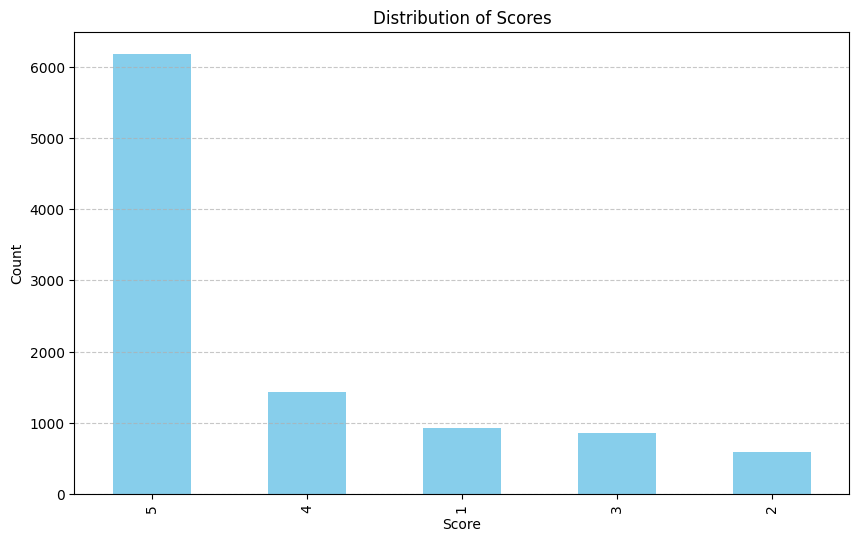

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
data['Score'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Sentiment Distribution

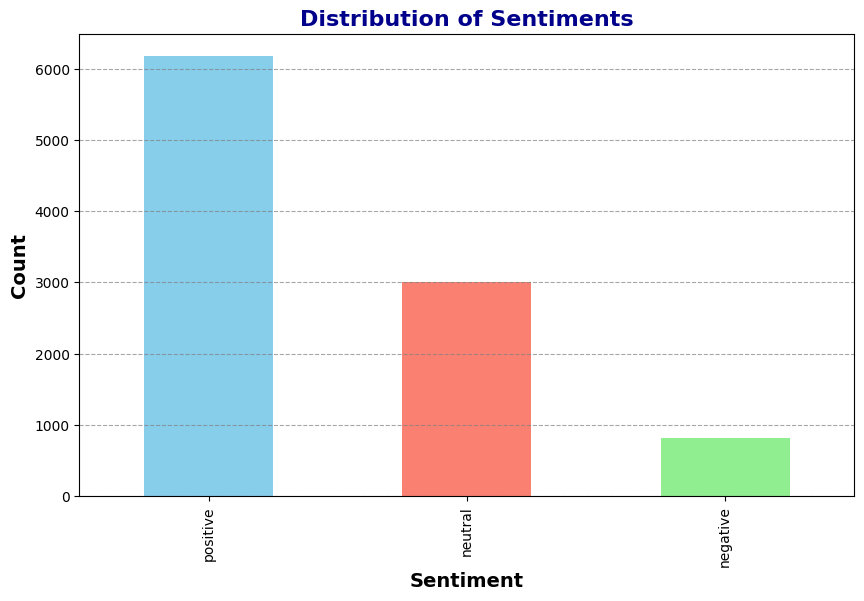

In [93]:
plt.figure(figsize=(10, 6))
sentiment_counts = data['Sentiment_sa'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    
# Customizing the plot
plt.title('Distribution of Sentiments', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Sentiment', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
plt.show()

WordCloud Generation

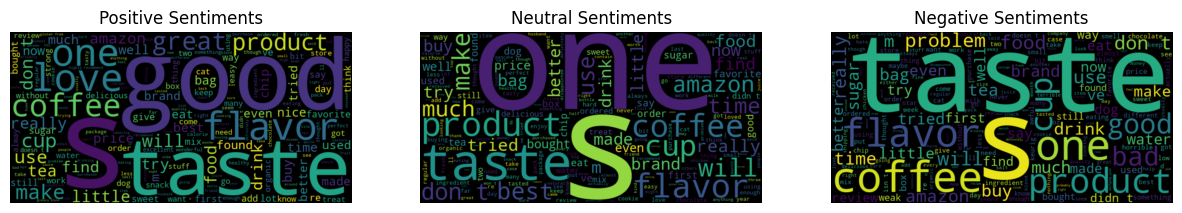

: 

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


data['Cleaned_Text'] = data['Cleaned_Text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Separate Positive, Neutral, and Negative Sentiment Texts
positive_texts = ' '.join(data[data['Sentiment_sa'] == 'positive']['Cleaned_Text'])
neutral_texts = ' '.join(data[data['Sentiment_sa'] == 'neutral']['Cleaned_Text'])
negative_texts = ' '.join(data[data['Sentiment_sa'] == 'negative']['Cleaned_Text'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_texts)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_texts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_texts)

# Display the word clouds
plt.figure(figsize=(15, 5))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiments')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiments')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiments')
plt.axis('off')

plt.show()


In [11]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

class SentimentAlgorithm:
    def __init__(self):
        self.custom_lexicon = {
            # Positive sentiment words
            "good": 2,
            "nice":2,
            "happy": 3,
            "Big":3,
            "pleasant": 3,
            "suprisingly": 3,
            "great": 4,
            "fantastic": 4,
            "love": 4,
            "joyful":4,
            "congratulation":4,
            "delightful": 4,
            "strong":4,
            "awesome":4.75,
            "excellent": 5,
            "wonderful": 5,
            "amazing": 5,
            "marvelous": 5,
            "highly":5,
            "high":5,
            "positive": 5,
            

            # Negative sentiment words
            "bad": -2,
            "mean":-2,
            "sad": -3,
            "Small":-3,
            "problem":-3, "problems":-3,
            "disappointing": -3,
            "unpleasant": -3,
            "abusive":-4,
            "terrible": -4,
            "awful": -4,
            "miserable": -4,
            "hate": -4,
            "low":-4,
            "weak":-4,
            "ruin":-4,
            "worse":-4.75,
            "horrible": -5,
            "disgusting": -5,
            "negative":-5,
            "violence":-5,

            
        }
        
        self.custom_amplifiers = {
            # Modifiers (amplifiers)
            # Amplifier Increases sentiment score, the value will be greater than 0.
            "exact":0.5, "excatly":0.5,
            "barely": 0.10,
            "slightly": 0.10,
            "somewhat": 0.10,
            "unlimited":0.75,
            "normal":0.5,
            "true": 0.8, "truly":0.8,
            "even":0.55, "evenly":0.55,          
            "attentive":0.8,
            "more":0.85,
            "compliments":0.9,
            "win":0.9, "winning":0.95, "wins":0.99,
            "easy":0.35,
            "fortunately":0.5, "fortunate":0.5,
            "glad":0.8,
            "enjoy":0.85, "enjoyable":0.85, "enjoying":0.85, "enjoyed":0.85,
            "excite":0.95, "excited":0.95, "exciting":0.95,
            "protect":0.75, "protected":0.75, "protecting":0.75, "protects":0.75,
            "quite": 0.25,
            "very": 0.65,
            "right":0.8,
            "flavourful":0.8, "flavour":0.45,
            "praise":0.75, "applause":0.75,
            "motivate":0.90, "motivates":0.90, "motivated":0.90, "motivating":0.90,
            "extremely": 0.75,
            "recommend":0.8, "recommended":0.8, "recommending":0.8,
            
            
        }

        self.custom_negations ={
            # Negations (Negates the sentiment of the following word, the value will be less than 0)
            "different":-0.25, "difference":-0.25,
            "left":-0.5,
            "leave":-0.5,
            "miss":-0.55, "missing":-0.75, "missed":-0.75,
            "bored":-0.6, "bore":-0.6, "boring":-0.6,
            "hardly": -0.7,
            "lose":-0.75, "losing":-0.95, "losed":-0.75, 
            "barely": -0.8,
            "enough":-0.75,
            "uneven":-0.8,
            "False":-0.8,
            "distractive":-0.8,
            "hard":-0.9,
            "fail":-0.9, "fails":-0.9, "failed":-1.75,
            "unfortunately":-0.95, "unfortunate":-0.95,
            "don't":-0.99,
            "not": -0.99,
            "never": -0.99,
            "no": -0.99,
            "wrong":-0.85,
            "curse":-0.9,
            "insult":-0.9,
            "harras":-0.9, "harrasing":-0.9,            
        }            

    def preprocess_paragraph(self, paragraph):
        Cleaned_text = re.sub(r'http\S+|www\S+|https\S+|href\S+', ' ', paragraph, flags=re.MULTILINE)
        soup = BeautifulSoup(Cleaned_text, 'html.parser')
        Cleaned_text = soup.get_text(separator=' ')
        Cleaned_text = re.sub(r'[<>=,.()/!]+', ' ', Cleaned_text)
        Cleaned_text = re.sub('[^a-zA-Z]', ' ', Cleaned_text)
        Cleaned_text = re.sub(r'\s+', ' ', Cleaned_text).strip()
        Cleaned_text = Cleaned_text.lower()
        Cleaned_text = word_tokenize(Cleaned_text)
        return Cleaned_text

    def preprocess_dataframe(self, data):
        corpus = []
        for i in range(len(data)):
            Cleaned_text = re.sub(r'http\S+|www\S+|https\S+|href\S+', ' ', data["Text"][i], flags=re.MULTILINE)
            soup = BeautifulSoup(Cleaned_text, 'html.parser')
            Cleaned_text = soup.get_text(separator=' ')
            Cleaned_text = re.sub(r'[<>=,.()/!]+', ' ', Cleaned_text)
            Cleaned_text = re.sub('[^a-zA-Z]', ' ', Cleaned_text)
            Cleaned_text = re.sub(r'\s+', ' ', Cleaned_text).strip()
            Cleaned_text = Cleaned_text.lower()
            Cleaned_text = word_tokenize(Cleaned_text)
            corpus.append(" ".join(Cleaned_text))
        data['Cleaned_Text'] = corpus
        return data

    def preprocess(self, input_data):
        if isinstance(input_data, pd.DataFrame):
            return self.preprocess_dataframe(input_data)
        elif isinstance(input_data, str):
            return self.preprocess_paragraph(input_data)
        else:
            raise ValueError("Input data must be a pandas DataFrame or a string representing a paragraph.")

    def calculate_sentiment(self, text):
        words = self.preprocess(text)
        score = 0
        i = 0
        
        while i < len(words):
            word = words[i]
            if word in self.custom_lexicon:
                current_score = self.custom_lexicon[word]
                
                # Check for modifiers or negations before the sentiment word
                if i > 0:
                    prev_word = words[i-1]
                    if prev_word in self.custom_negations:
                        current_score *= self.custom_negations[prev_word]
                    elif prev_word in self.custom_amplifiers:
                        current_score *= self.custom_amplifiers[prev_word]
                        
                    # Handle the case where negation and amplifier are combined
                    if i > 1:
                        prev_prev_word = words[i-2]
                        if prev_prev_word in self.custom_negations:
                            current_score *= self.custom_negations[prev_prev_word]

                score += current_score
            i += 1
        
        return score

    def classify_sentiment(self, text):
        score = self.calculate_sentiment(text)
        if score > 1:
            return "positive"
        elif score < -1:
            return "negative"
        else:
            return "neutral"

    def sentiment_distribution(self, text):
        sentences = sent_tokenize(text)
        sentiment_scores = []
        sentiment_labels = []

        for sentence in sentences:
            score = self.calculate_sentiment(sentence)
            label = self.classify_sentiment(sentence)
            sentiment_scores.append((sentence, score))
            sentiment_labels.append((sentence, label))
        
        return sentiment_scores, sentiment_labels
    
    def fit(self, X_train, y_train):
        if len(X_train) != len(y_train):
            raise ValueError("Training features and labels must have the same length.")
        
        for text, sentiment in zip(X_train, y_train):
            words = self.preprocess(text)
            for word in words:
                if word not in self.custom_lexicon:
                    # Assign sentiment value to the new word
                    if sentiment == 1:  # Assuming 1 is for 'positive'
                        self.custom_lexicon[word] = 1
                    elif sentiment == -1:  # Assuming -1 is for 'negative'
                        self.custom_lexicon[word] = -1
                    elif sentiment == 0:  # Assuming 0 is for 'neutral'
                        self.custom_lexicon[word] = 0

    def transform(self, X):
        # Transform input data to the form needed for prediction
        return [self.preprocess_paragraph(text) for text in X]

    def predict(self, X_test):
        # Use the transform method to preprocess test data
        cleaned_texts = [' '.join(text) for text in self.transform(X_test)]
        predicted_labels = [self.classify_sentiment(text) for text in cleaned_texts]
        return predicted_labels
    
    def compute_accuracy(self, X_test, y_test):
        predicted_labels = self.predict(X_test)
        accuracy = accuracy_score(y_test, predicted_labels)
        return accuracy

    '''def compute_accuracy(self, X_test, y_test):
        # Ensure that the y_test labels are in the same format as predictions
        y_test_labels = [label_encoder.inverse_transform([label])[0] for label in y_test]
        predicted_labels = self.predict(X_test)
        accuracy = accuracy_score(y_test_labels, predicted_labels)
        return accuracy'''

# Example usage
sentiment_algorithm = SentimentAlgorithm()

# Load and preprocess the dataset
data = pd.read_csv(r'Data\Review.csv')  # Replace with your actual file path
data['Cleaned_Text'] = data['Text'].apply(lambda x: ' '.join(sentiment_algorithm.preprocess_paragraph(x)))
data['Sentiment'] = data['Text'].apply(lambda x: sentiment_algorithm.classify_sentiment(x))

# Encode sentiments
label_encoder = LabelEncoder()
data['Encoded_Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

X = data['Cleaned_Text']
y = data['Encoded_Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
sentiment_algorithm = SentimentAlgorithm()
sentiment_algorithm.fit(X_train, y_train)


# Compute accuracy
#accuracy = sentiment_algorithm.compute_accuracy(X_test, y_test)
#print(f"Accuracy: {accuracy:.2f}")

y_pred_custom_sa = sentiment_algorithm.predict(X_test)

# Convert y_test to string labels
y_test_labels = label_encoder.inverse_transform(y_test)

# Compute accuracy
accuracy_pred = sentiment_algorithm.compute_accuracy(y_test_labels, y_pred_custom_sa)
print(f"Accuracy: {accuracy_pred:.2f}")

# Generate the classification report
cl_report = classification_report(y_test_labels, y_pred_custom_sa)
print(f"Classification Report:\n{cl_report}")

#Generate the confusion matrix
confusion_matrix_sa = confusion_matrix(y_test_labels, y_pred_custom_sa)
print(f"Confusion Matrix:\n{confusion_matrix_sa}")



C:\Users\vijayalekshmi\AppData\Local\Temp\ipykernel_14352\846809823.py:126: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(Cleaned_text, 'html.parser')
C:\Users\vijayalekshmi\AppData\Local\Temp\ipykernel_14352\846809823.py:126: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(Cleaned_text, 'html.parser')


Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       158
     neutral       0.00      0.00      0.00       650
    positive       0.60      1.00      0.75      1192

    accuracy                           0.60      2000
   macro avg       0.20      0.33      0.25      2000
weighted avg       0.36      0.60      0.45      2000

Confusion Matrix:
[[   0    0  158]
 [   0    0  650]
 [   0    0 1192]]


c:\Users\vijayalekshmi\Desktop\SentimentAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vijayalekshmi\Desktop\SentimentAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vijayalekshmi\Desktop\SentimentAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif